In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 数据预处理
* 读取数据
* 标准化
* 拼接一列，作为bias项
* 切分数据集

In [2]:
X_train_dir = 'data/X_train'
Y_train_dir = 'data/Y_train'
X_test_dir = 'data/X_test'

In [3]:
with open(X_train_dir, 'r') as f:
    lines = f.readlines()[1:] # 第一行为目录
    X_train = np.array([line.strip().split(',')[1:] for line in lines], dtype=float) # 第一列为id
    f.close()
    
with open(Y_train_dir, 'r') as f:
    lines = f.readlines()[1:]
    Y_train = np.array([line.strip().split(',')[1:] for line in lines], dtype=float)
    f.close()
    
with open(X_test_dir, 'r') as f:
    lines = f.readlines()[1:]
    X_test = np.array([line.strip().split(',')[1:] for line in lines], dtype=float)
    f.close()

print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))

X_train.shape: (54256, 510)
Y_train.shape: (54256, 1)
X_test.shape: (27622, 510)


In [4]:
x_mean = np.mean(X_train, axis=0)
x_std = np.std(X_train, axis=0)
for j in range(X_train.shape[1]):
    X_train[:, j] = (X_train[:, j] - x_mean[j]) / (x_std[j] + 1e-8) # 防止分母为0
        

x_mean_test = np.mean(X_test, axis=0)
x_std_test = np.std(X_test, axis=0)
for j in range(X_test.shape[1]):
    X_test[:, j] = (X_test[:, j] - x_mean_test[j]) / (x_std_test[j] + 1e-8)
    
X_train = np.concatenate((X_train, np.ones((X_train.shape[0], 1))), axis=1)
X_test = np.concatenate((X_test, np.ones((X_test.shape[0], 1))), axis=1)
            
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_test.shape: {}'.format(X_test.shape))

X_train.shape: (54256, 511)
Y_train.shape: (54256, 1)
X_test.shape: (27622, 511)


In [8]:
def train_dev_split(X, Y, train_ratio):
    split_index = int(X_train.shape[0] * train_ratio)
    return X[:split_index, :], Y[:split_index], X[split_index:, :], Y[split_index:]

X_train, Y_train, X_dev, Y_dev = train_dev_split(X_train, Y_train, 0.9)

In [9]:
print('X_train.shape: {}'.format(X_train.shape))
print('Y_train.shape: {}'.format(Y_train.shape))
print('X_dev.shape: {}'.format(X_dev.shape))
print('Y_dev.shape: {}'.format(Y_dev.shape))
print('X_test.shape: {}'.format(X_test.shape))

X_train.shape: (48830, 511)
Y_train.shape: (48830, 1)
X_dev.shape: (5426, 511)
Y_dev.shape: (5426, 1)
X_test.shape: (27622, 511)


#### LR
* f
* loss : cross_entropy
* gradient

In [5]:
def func(X, w):
    z = np.dot(X, w)
    return np.clip(1 / (1.0 + np.exp(-z)), 1e-8,1 - (1e-8)) # 限制在某个区间内,防止出现无穷大

def cross_entropy_loss(y, y_pred):
    loss = - np.dot(y.T, np.log(y_pred)) - np.dot((1 - y).T, np.log(1 - y_pred))
    loss = int(loss[0])
    return loss / y.shape[0]

def grad(x, label, y_pred):
    error = y_pred - label
    grad = np.dot(x.T, error)
    return grad

def acc(y, y_pred):
    right_num = np.sum(y == y_pred)
    return right_num / y.shape[0]

In [7]:
# 全部的train 训一遍
max_iter = 10
batch_size = 8
lr = 0.002
dev_loss = []
train_loss = []
dev_acc = []
train_acc = []
batch_num = np.floor(X_train.shape[0] / batch_size)
w = np.random.randn(X_train.shape[1], 1)

step = 0
for epoch in range(max_iter):
    for idx in range(int(batch_num)):
        X = X_train[idx * batch_size : (idx + 1) * batch_size, :]
        Y = Y_train[idx * batch_size : (idx + 1) * batch_size]
        
        y_pred = func(X, w)
        grad_w = grad(X, Y, y_pred)
        
        
        w = w - lr * grad_w
    
        step += 1
#         if step % 100 == 0:
#     y_dev = func(X_dev, w)
    y_train = func(X_train, w)
#     label_dev = np.round(y_dev) # 预测的label
    label_train = np.round(y_train)
#     dev_loss.append(cross_entropy_loss(Y_dev, y_dev))
    train_loss.append(cross_entropy_loss(Y_train, y_train))

#     dev_acc.append(acc(Y_dev, label_dev))
    train_acc.append(acc(Y_train, label_train))

#     print('Train_loss: {} | dev_loss: {} | train_acc: {} | dev_acc: {}'.
#           format(train_loss[-1], dev_loss[-1], train_acc[-1], dev_acc[-1]))
            
print('Training loss: {}'.format(train_loss[-1]))
# print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
# print('Development accuracy: {}'.format(dev_acc[-1]))

Training loss: 0.2873599233264524
Training accuracy: 0.8770458566794456


In [11]:
max_iter = 10
batch_size = 8
lr = 0.002
dev_loss = []
train_loss = []
dev_acc = []
train_acc = []
batch_num = np.floor(X_train.shape[0] / batch_size)
w = np.random.randn(X_train.shape[1], 1)

step = 0
for epoch in range(max_iter):
    for idx in range(int(batch_num)):
        X = X_train[idx * batch_size : (idx + 1) * batch_size, :]
        Y = Y_train[idx * batch_size : (idx + 1) * batch_size]
        
        y_pred = func(X, w)
        grad_w = grad(X, Y, y_pred)
        
        
        w = w - lr * grad_w
    
        step += 1
#         if step % 100 == 0:
    y_dev = func(X_dev, w)
    y_train = func(X_train, w)
    label_dev = np.round(y_dev) # 预测的label
    label_train = np.round(y_train)
    dev_loss.append(cross_entropy_loss(Y_dev, y_dev))
    train_loss.append(cross_entropy_loss(Y_train, y_train))

    dev_acc.append(acc(Y_dev, label_dev))
    train_acc.append(acc(Y_train, label_train))

    print('Train_loss: {} | dev_loss: {} | train_acc: {} | dev_acc: {}'.
          format(train_loss[-1], dev_loss[-1], train_acc[-1], dev_acc[-1]))
            
print('Training loss: {}'.format(train_loss[-1]))
print('Development loss: {}'.format(dev_loss[-1]))
print('Training accuracy: {}'.format(train_acc[-1]))
print('Development accuracy: {}'.format(dev_acc[-1]))

Train_loss: 0.45695269301658814 | dev_loss: 0.47327681533357907 | train_acc: 0.8668236739709195 | dev_acc: 0.8610394397346112
Train_loss: 0.33905386033176327 | dev_loss: 0.3639882049391817 | train_acc: 0.8740733155846816 | dev_acc: 0.8689642462218946
Train_loss: 0.3078435388081098 | dev_loss: 0.3332104681164762 | train_acc: 0.8766332172844563 | dev_acc: 0.8698857353483229
Train_loss: 0.29588367806676225 | dev_loss: 0.3204939181717656 | train_acc: 0.8776776571779644 | dev_acc: 0.8715444157758938
Train_loss: 0.2910710628711857 | dev_loss: 0.31385919646148175 | train_acc: 0.8782510751587139 | dev_acc: 0.8715444157758938
Train_loss: 0.288511161171411 | dev_loss: 0.3101732399557685 | train_acc: 0.8780462830227319 | dev_acc: 0.8719130114264652
Train_loss: 0.2868933032971534 | dev_loss: 0.30962034647991155 | train_acc: 0.8778619701003482 | dev_acc: 0.8706229266494655
Train_loss: 0.2861150931804219 | dev_loss: 0.3088831551787689 | train_acc: 0.8781896375179193 | dev_acc: 0.8711758201253226
Tra

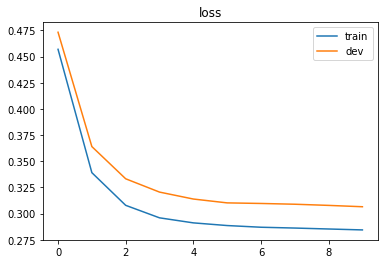

In [12]:
plt.title('loss')
plt.plot(train_loss)
plt.plot(dev_loss)
plt.legend(['train', 'dev'])
plt.show()

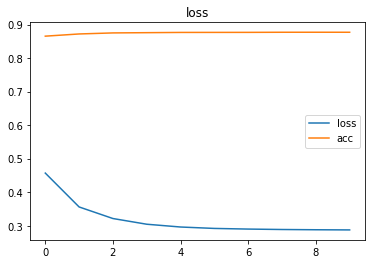

In [9]:
plt.title('loss')
plt.plot(train_loss)
plt.plot(train_acc)
plt.legend(['loss', 'acc'])
plt.show()

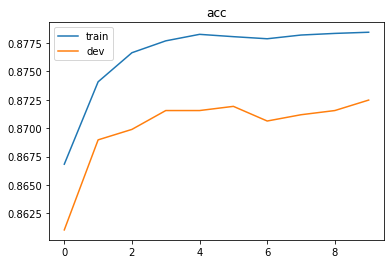

In [13]:
plt.title('acc')
plt.plot(train_acc)
plt.plot(dev_acc)
plt.legend(['train', 'dev'])
plt.show()

In [8]:
import csv
pred_prob = func(X_test, w)
pred_label = np.round(pred_prob)

with open('data/submission.csv', 'w') as f:
    csv_writer = csv.writer(f)
    csv_writer.writerow(['id', 'label'])
    for i, label in enumerate(pred_label):
        csv_writer.writerow([i, int(label[0])])